In [1]:
import sys
sys.path.append("../src")

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib notebook

# Load dataset and do some preprocessing

In [3]:
train_path = "../data/train.csv"

In [4]:
df_data = pd.read_csv(train_path, sep=",")

In [5]:
df_features = df_data[df_data.columns.difference(['full_label', 'label'])]
df_labels = df_data["label"]

## Set X (y) matrix(vector)

In [6]:
X = df_features.values
print(X.shape)

(29, 29)


In [7]:
y = df_labels.values
print(y.shape)

(29,)


# Logistic regression

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [9]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(21, 29)
(21,)
(8, 29)
(8,)


## Define the models

In [10]:
clf_l1_LR = LogisticRegression(penalty='l1', solver='saga', max_iter=1000, multi_class='multinomial')
clf_l2_LR = LogisticRegression(penalty='l2', solver='saga', max_iter=1000, multi_class='multinomial')

## Train models

In [11]:
clf_l1_LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='multinomial', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
clf_l2_LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

## Test models

In [13]:
predictions_l1 = clf_l1_LR.predict(X_test)
predictions_l2 = clf_l2_LR.predict(X_test)

In [14]:
score_l1 = clf_l1_LR.score(X_test, y_test)
print(score_l1)

1.0


In [15]:
score_l2 = clf_l2_LR.score(X_test, y_test)
print(score_l1)

1.0


## Confusion matrix

In [16]:
cm_l1 = metrics.confusion_matrix(y_test, predictions_l1)
print(cm_l1)

[[1 0 0]
 [0 2 0]
 [0 0 5]]


In [17]:
cm_l2 = metrics.confusion_matrix(y_test, predictions_l2)
print(cm_l2)

[[1 0 0]
 [0 2 0]
 [0 0 5]]


## Probabilities

In [18]:
clf_l1_LR.predict_proba(X_test)

array([[0.87679282, 0.02807534, 0.09513183],
       [0.20414355, 0.02511737, 0.77073908],
       [0.06445214, 0.14271379, 0.79283407],
       [0.00410398, 0.97974445, 0.01615157],
       [0.01623928, 0.8609562 , 0.12280453],
       [0.1709558 , 0.06226768, 0.76677653],
       [0.27920594, 0.04453263, 0.67626144],
       [0.39456688, 0.07463961, 0.53079351]])

# Validation with KFold

In [19]:
n_splits = 5
min_iter = 0
max_iter = 4
kfold_accuracy_l1 = []
kfold_f1_l1 = []
kfold_accuracy_l2 = []
kfold_f1_l2 = []

for k_C in range(min_iter,max_iter+1):
    kf = KFold(n_splits=n_splits)
    accuracy_l1 = []
    f1_l1 = []
    accuracy_l2 = []
    f1_l2 = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Trainning
        clf_l1_LR = LogisticRegression(penalty='l1', solver='saga', max_iter=10000, multi_class='multinomial', C=10**-k_C)
        clf_l2_LR = LogisticRegression(penalty='l2', solver='saga', max_iter=10000, multi_class='multinomial', C=10**-k_C)
        
        clf_l1_LR.fit(X_train, y_train)
        clf_l2_LR.fit(X_train, y_train)

        #Accuraccy and F1 score
        y_predict_l1 = clf_l1_LR.predict(X_test)
        accuracy_l1.append(clf_l2_LR.score(X_test, y_test))
        f1_l1.append(f1_score(y_test, y_predict_l1, average='micro'))

        y_predict_l2 = clf_l1_LR.predict(X_test)
        accuracy_l2.append(clf_l2_LR.score(X_test, y_test))
        f1_l2.append(f1_score(y_test, y_predict_l2, average='micro'))
        
    kfold_accuracy_l1.append(np.mean(accuracy_l1))
    kfold_f1_l1.append(np.mean(f1_l1))
    kfold_accuracy_l2.append(np.mean(accuracy_l2))
    kfold_f1_l2.append(np.mean(f1_l2))
        

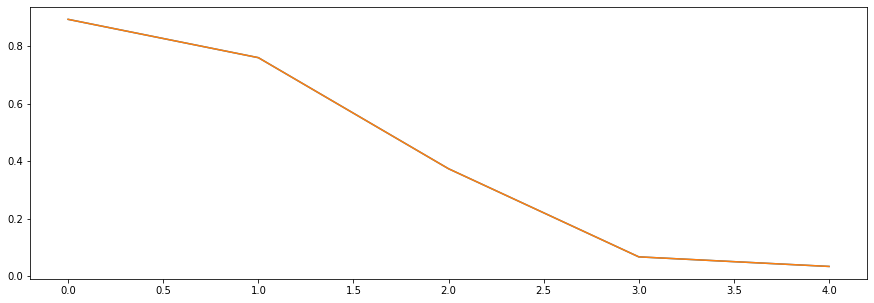

In [20]:
plt.figure(figsize=(15,5))
plt.plot(np.arange(min_iter,max_iter+1,1), kfold_accuracy_l1)
plt.plot(np.arange(min_iter,max_iter+1,1), kfold_accuracy_l2)
plt.show()

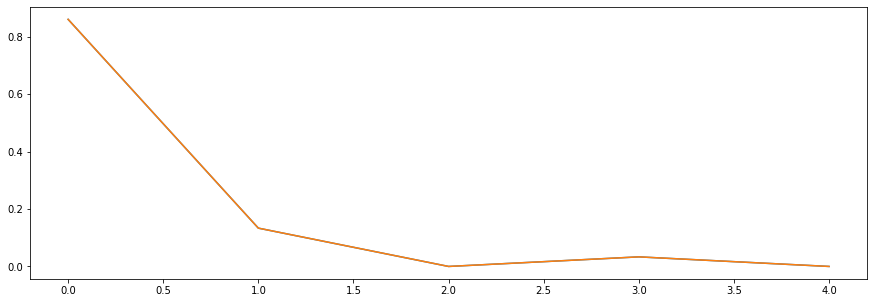

In [21]:
plt.figure(figsize=(15,5))
plt.plot(np.arange(min_iter,max_iter+1,1), kfold_f1_l1)
plt.plot(np.arange(min_iter,max_iter+1,1), kfold_f1_l2)
plt.show()

# Logisitc regression with selected features

In [22]:
selected_data = pd.read_csv("../data/selected_train.csv", sep=",")

In [23]:
df_features_selected = selected_data[selected_data.columns.difference(['label'])]
df_labels_selected = selected_data["label"]

In [24]:
X_selected = df_features_selected.values
print(X_selected.shape)

y_selected = df_labels.values
print(y_selected.shape)

(29, 56)
(29,)


# Validation with KFold

In [25]:
n_splits = 5
min_iter = 2
max_iter = 6
kfold_accuracy_l1_s = []
kfold_f1_l1_s = []
kfold_accuracy_l2_s = []
kfold_f1_l2_s = []

for k in range(min_iter,max_iter+1):
    kf = KFold(n_splits=n_splits)
    accuracy_l1 = []
    f1_l1 = []
    accuracy_l2 = []
    f1_l2 = []
    
    for train_index, test_index in kf.split(X_selected):
        X_train, X_test = X_selected[train_index], X_selected[test_index]
        y_train, y_test = y_selected[train_index], y_selected[test_index]

        # Trainning
        clf_l1_LR = LogisticRegression(penalty='l1', solver='saga', max_iter=10**k, multi_class='multinomial', C=1)
        clf_l2_LR = LogisticRegression(penalty='l2', solver='saga', max_iter=10**k, multi_class='multinomial', C=1)
        
        clf_l1_LR.fit(X_train, y_train)
        clf_l2_LR.fit(X_train, y_train)

        #Accuraccy and F1 score
        y_predict_l1 = clf_l1_LR.predict(X_test)
        accuracy_l1.append(clf_l2_LR.score(X_test, y_test))
        f1_l1.append(f1_score(y_test, y_predict_l1, average='micro'))

        y_predict_l2 = clf_l1_LR.predict(X_test)
        accuracy_l2.append(clf_l2_LR.score(X_test, y_test))
        f1_l2.append(f1_score(y_test, y_predict_l2, average='micro'))
        
    kfold_accuracy_l1_s.append(np.mean(accuracy_l1))
    kfold_f1_l1_s.append(np.mean(f1_l1))
    kfold_accuracy_l2_s.append(np.mean(accuracy_l2))
    kfold_f1_l2_s.append(np.mean(f1_l2))
        

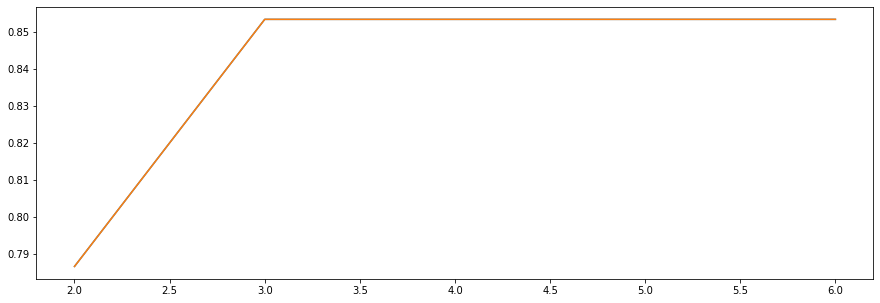

In [26]:
plt.figure(figsize=(15,5))
plt.plot(np.arange(min_iter,max_iter+1,1), kfold_accuracy_l1_s)
plt.plot(np.arange(min_iter,max_iter+1,1), kfold_accuracy_l2_s)
plt.show()

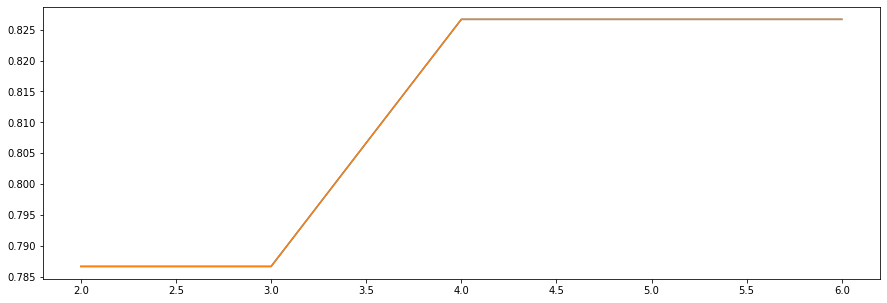

In [27]:
plt.figure(figsize=(15,5))
plt.plot(np.arange(min_iter,max_iter+1,1), kfold_f1_l1_s)
plt.plot(np.arange(min_iter,max_iter+1,1), kfold_f1_l2_s)
plt.show()

In [8]:
from sklearn.model_selection import cross_validate
scoring = ['accuracy', 'f1_macro']
clf = LogisticRegression(penalty='l2', solver='saga', max_iter=10000, multi_class='multinomial', C=1)
scores = cross_validate(clf, X, y, cv=5, scoring=scoring)
for key in scores:
    print(key+' : '+str(scores[key].mean()))

fit_time : 0.035709476470947264
score_time : 0.005917167663574219
test_accuracy : 0.9266666666666667
test_f1_macro : 0.9199999999999999


In [29]:
from sklearn.model_selection import cross_validate
scoring = ['accuracy', 'f1_macro']
clf = LogisticRegression(penalty='l2', solver='saga', max_iter=10000, multi_class='multinomial', C=1)
scores = cross_validate(clf, X_selected, y_selected, cv=5, scoring=scoring)
for key in scores:
    print(key+' : '+str(scores[key].mean()))

fit_time : 0.08054885864257813
score_time : 0.0009696006774902344
test_accuracy : 0.9266666666666667
test_f1_macro : 0.9199999999999999


# Predictions

In [16]:
PATH_TEST       = "../data/test.csv"
PATH_TEST_PREDS = "../data//test_predict.csv"
PATH_OUT        = "../data/preds_LogisticReg.csv"

In [9]:
full_labels = pd.read_csv(PATH_TEST)["full_label"]
df_test     = pd.read_csv(PATH_TEST_PREDS)
X_to_pred   = df_test.values

In [10]:
clf = LogisticRegression(penalty='l2', solver='saga', max_iter=10000, multi_class='multinomial', C=1).fit(X, y)

In [11]:
preds = clf.predict(X_to_pred)

In [12]:
proba = clf.predict_proba(X_to_pred)

In [13]:
df_predictions = pd.DataFrame()
df_predictions["full_label"] = full_labels
df_predictions["predicted"] = preds
df_predictions["proba_0"] = proba[:,0]
df_predictions["proba_1"] = proba[:,1]
df_predictions["proba_2"] = proba[:,2]

In [17]:
df_predictions.to_csv(PATH_OUT, index=False)